# **Crop Yield Prediction**

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions. The basic ingredients that sustain humans are similar. We eat a lot of corn, wheat, rice and other simple crops. In this project the prediction of top 10 most consumed yields all over the world is established by applying machine learning techniques. It consist of 10 most consumed crops. It is a regression problem













**These corps include :**



*   Cassava

*   Maize

*   Plantains and others
*   Potatoes

*   Rice,Paddy



*   Sorghum

*   Soybeans
*   Sweet potatoes


* Wheat


*   Yams





# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import math
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from random import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, cross_val_score


**After importing required libraries, crops yield of ten most consumed crops around the world was downloaded from FAO webiste.The collected data include country, item, year starting from 1990 to 2013 and yield value.**

In [ ]:
df1 = pd.read_csv('yield_df.csv')
df1.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df1.shape

(28242, 8)

In [ ]:
df1.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


# Finding the number if unique values in each column


In [ ]:
df1.nunique()

Unnamed: 0                       28242
Area                               101
Item                                10
Year                                23
hg/ha_yield                      11514
average_rain_fall_mm_per_year      100
pesticides_tonnes                 1673
avg_temp                          1831
dtype: int64

# **Randomization**
TO reduce the biasness of the dataset.

In [ ]:
data_array=df1.values
shuffle(data_array)
# Convert the shuffled array back to a pandas DataFrame
shuffled_data = pd.DataFrame(data_array, columns=df1.columns)

# Save the shuffled dataset to a new CSV file
shuffled_data.to_csv('shuffled_data.csv', index=False)

## **Satrted working after the randomization with the shuffled data set**

In [ ]:
df=pd.read_csv("shuffled_data.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
3,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
4,0,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [ ]:
df.shape

(28242, 8)

In [ ]:
df.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,10113,Haiti,Maize,2008,7807,1440.0,27.85,27.08
28238,17511,Kenya,Cassava,2001,77681,630.0,1578.00,16.10
28239,23485,Peru,Plantains and others,2010,128578,1738.0,15590.54,16.97
28240,2248,Bangladesh,Wheat,2004,19527,2666.0,5587.81,26.14
28241,1029,Australia,Potatoes,1995,298183,534.0,25598.00,16.95


## **We will drop the "Unnamed: 0" column**

In [ ]:
df.shape

(28242, 8)

In [ ]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,Maize,1990,36613,1485.0,121.0,16.37
3,Albania,Maize,1990,36613,1485.0,121.0,16.37
4,Albania,Maize,1990,36613,1485.0,121.0,16.37


## **First let us categorize our features and target variables**


In [ ]:
features=df.drop(columns=["hg/ha_yield"])
target=df["hg/ha_yield"]
features.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,Maize,1990,1485.0,121.0,16.37
3,Albania,Maize,1990,1485.0,121.0,16.37
4,Albania,Maize,1990,1485.0,121.0,16.37


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ MB


# **generate descriptive statistics**

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000
mean,2001.251505,76694.561221,1211.535090,50689.652279,20.227483
std,7.059527,84019.910379,720.333816,76801.429183,6.149761
min,1990.000000,540.000000,51.000000,0.040000,1.300000
25%,1995.000000,20066.000000,589.000000,2304.000000,16.880000
50%,2001.000000,40000.000000,1083.000000,27422.770000,20.770000
75%,2008.000000,101000.000000,1761.000000,61586.560000,25.760000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [ ]:
df.shape

(28242, 7)

# **Data Pre Processing**

**here we can see in our data set that we have one and more with together in Item coloumn so we are making it as single data in our Item coloumn**

In [ ]:
df["Item"].unique()

array(['Maize', 'Potatoes', 'Soybeans', 'Rice, paddy', 'Sorghum', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [ ]:
features["Item"] = features["Item"].str.replace(", paddy", "Paddy", regex = False)
features["Item"].unique()

array(['Maize', 'Potatoes', 'Soybeans', 'RicePaddy', 'Sorghum', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [ ]:
features["Item"]=features["Item"].str.replace(" and others","",regex=False)
features["Item"].unique()

array(['Maize', 'Potatoes', 'Soybeans', 'RicePaddy', 'Sorghum', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains', 'Yams'], dtype=object)

In [ ]:
features.select_dtypes("object").head()

,Area,Item
0,Albania,Maize
1,Albania,Potatoes
2,Albania,Maize
3,Albania,Maize
4,Albania,Maize


In [ ]:
features.select_dtypes("number").head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1990,1485.0,121.0,16.37
1,1990,1485.0,121.0,16.37
2,1990,1485.0,121.0,16.37
3,1990,1485.0,121.0,16.37
4,1990,1485.0,121.0,16.37


In [ ]:
features.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,Maize,1990,1485.0,121.0,16.37
3,Albania,Maize,1990,1485.0,121.0,16.37
4,Albania,Maize,1990,1485.0,121.0,16.37


**Renaming The coloumns**

In [ ]:
df = df.rename(index=str, columns={"average_rain_fall_mm_per_year": "Avg. Rain fall"})

In [ ]:
df = df.rename(index=str, columns={"year": "Year", "hg/ha_yield":'Yield',"avg_temp":'Temperature','pesticides_tonnes':'Pesticides'})
df.head()

,Area,Item,Year,Yield,Avg. Rain fall,Pesticides,Temperature
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,Maize,1990,36613,1485.0,121.0,16.37
3,Albania,Maize,1990,36613,1485.0,121.0,16.37
4,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [ ]:
df['Area'].nunique()

100

**The dataframe has 100 Countries, ordering these by 10 the highest yield production:**

In [ ]:
df.groupby(['Area'],sort=True)['Yield'].sum().nlargest(10)

Area
Australia    345946750
Brazil       341092069
India        271202870
Argentina    138464476
Japan         66627723
Canada        56402430
Mexico        51422933
Egypt         47627493
Indonesia     46257996
Germany       44058427
Name: Yield, dtype: int64

**Australia has the highest yield production in the dataset.Inclusing items in the gorupby.**

In [ ]:
df.groupby(['Item','Area','Year'],sort=True)['Yield'].sum().nlargest(10)

Item            Area       Year
Potatoes        Australia  2009    9043675
Cassava         India      2009    8585825
Sweet potatoes  Australia  2000    8576469
Potatoes        Australia  1995    8349124
                           2005    8258808
                           2013    8094114
                           2012    8034432
Cassava         India      2011    8024940
Potatoes        Brazil     2012    7684796
                Australia  1997    7513344
Name: Yield, dtype: int64

**Australia is the highest for production Potatoes and sweet potatoes.Potatoes seems to be the dominated crop in the dataset,being the highest in 3 countries.**

## **Let us find features with high-corelation to each other**

<Axes: >

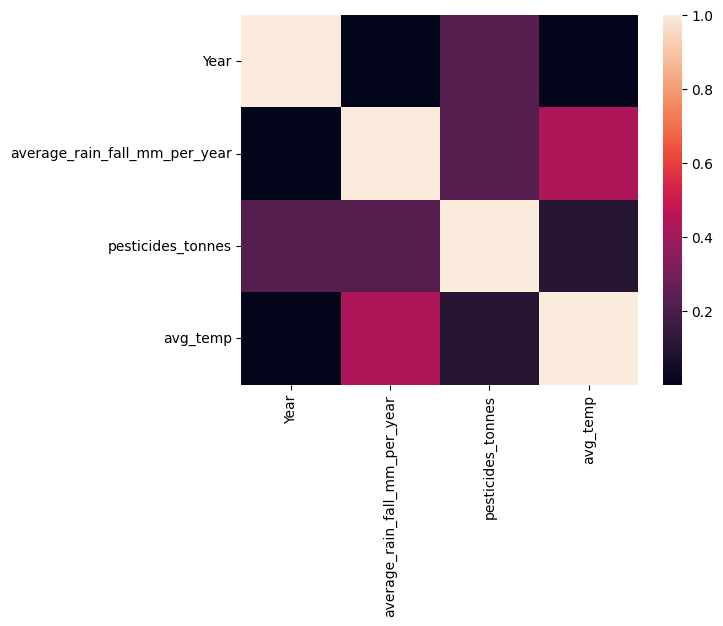

In [ ]:
corr=features.select_dtypes("number").corr()
sns.heatmap(corr)

## **We will be making a pipeline with OneHotEncoder and Ridge Regression**

In [ ]:
model=make_pipeline(
    OneHotEncoder(),
    Ridge()
)

In [ ]:
model.fit(features,target)

Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

In [ ]:
Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

In [ ]:
features.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,Maize,1990,1485.0,121.0,16.37
3,Albania,Maize,1990,1485.0,121.0,16.37
4,Albania,Maize,1990,1485.0,121.0,16.37


In [ ]:
predictions=model.predict(features)
predictions=pd.Series(predictions)
predictions.head()

0      5108.812038
1    159896.856166
2      5108.812038
3      5108.812038
4      5108.812038
dtype: float64

In [ ]:
target.head()

0    36613
1    66667
2    36613
3    36613
4    36613
Name: hg/ha_yield, dtype: int64

# **Pie Chart That Covered Area**

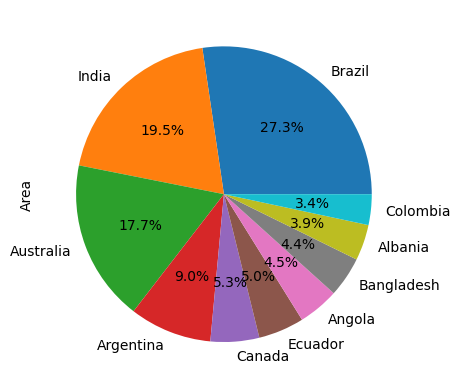

In [ ]:
df['Area'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')
plt.show()

# **Pie Chart That Covered Item**

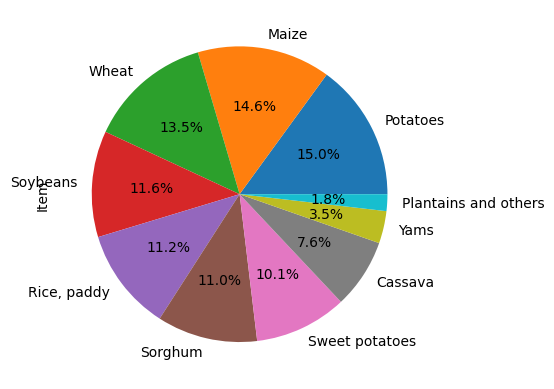

In [ ]:
df['Item'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')
plt.show()

# **Avg. Rain fall Box plot**

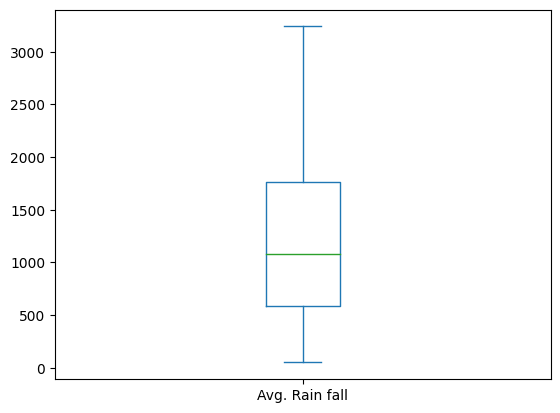

In [ ]:
df['Avg. Rain fall'].plot(kind='box')
plt.show()

In [ ]:
df.head()

,Area,Item,Year,Yield,Avg. Rain fall,Pesticides,Temperature
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,Maize,1990,36613,1485.0,121.0,16.37
3,Albania,Maize,1990,36613,1485.0,121.0,16.37
4,Albania,Maize,1990,36613,1485.0,121.0,16.37


# **Avg. Rain fall Histogram**

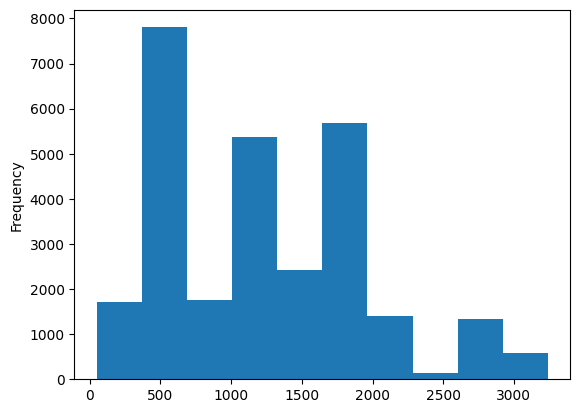

In [ ]:
df['Avg. Rain fall'].plot(kind='hist')
plt.show()

# **Pesticides Histogram**

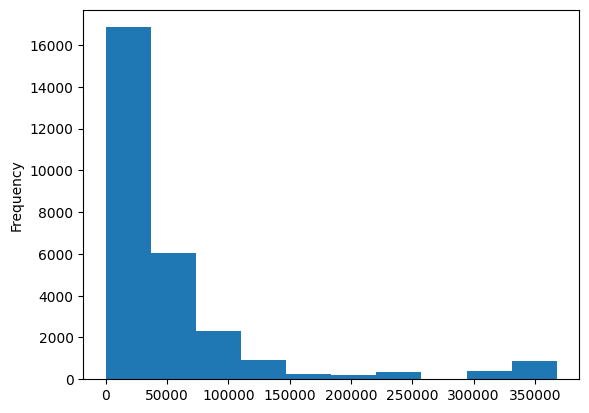

In [ ]:
df['Pesticides'].plot(kind='hist')
plt.show()

# **Pesticides box plot**

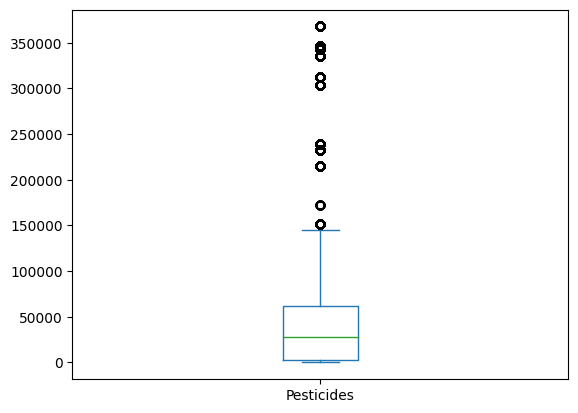

In [ ]:
df['Pesticides'].plot(kind='box')
plt.show()

# **Temperature Histogram**

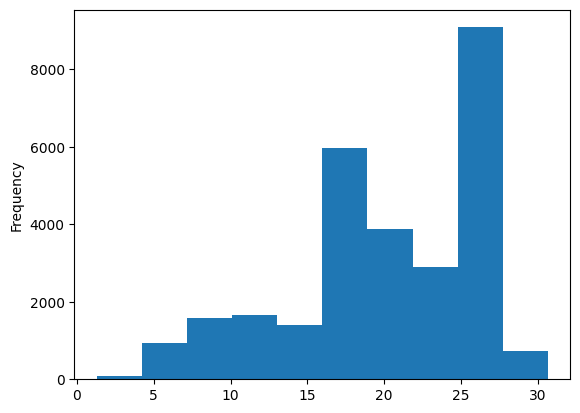

In [ ]:
df['Temperature'].plot(kind='hist' )
plt.show()

# **Temperature box plot**

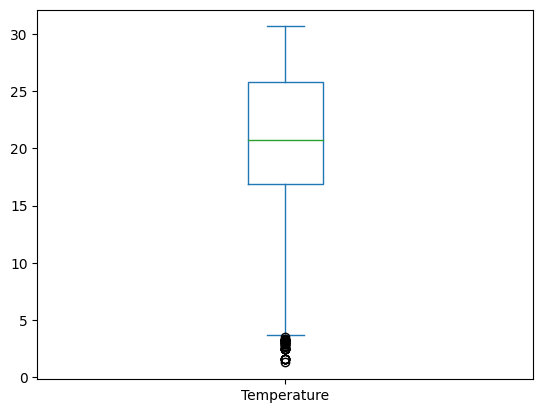

In [ ]:
df['Temperature'].plot(kind='box')
plt.show()

# **Checking for the dataypes**

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

<ipython-input-46-0a03dee6093e>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


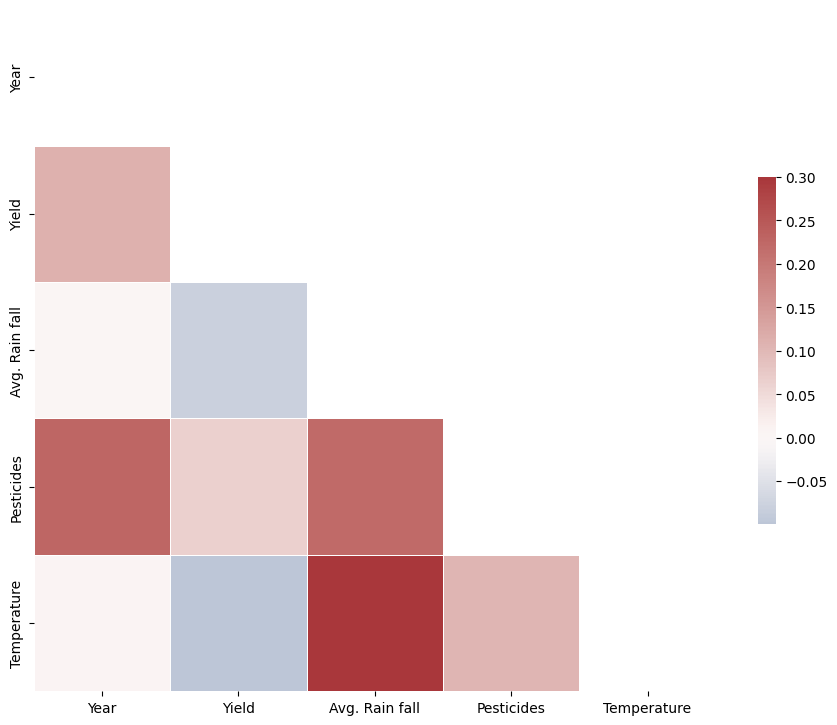

In [ ]:
correlation_data=df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# **It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe.**

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling. **bold text**

# **Encoding Categorical Variables:**

There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.

In [ ]:
df.head()

,Area,Item,Year,Yield,Avg. Rain fall,Pesticides,Temperature
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,Maize,1990,36613,1485.0,121.0,16.37
3,Albania,Maize,1990,36613,1485.0,121.0,16.37
4,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [ ]:
df = pd.get_dummies(df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=df.loc[:, df.columns != 'Yield']
label=df['Yield']
features.head()

,Year,Avg. Rain fall,Pesticides,Temperature,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
features = features.drop(['Year'], axis=1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Columns: 113 entries, Avg. Rain fall to Item_Yams
dtypes: float64(3), uint8(110)
memory usage: 3.8+ MB


In [ ]:
features.head()

,Avg. Rain fall,Pesticides,Temperature,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# **Scaling Features:**

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [ ]:
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

**After dropping year column in addition to scaling all values in features, the resulting array will look something like this :**

In [ ]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.29005958e-01, 4.23910666e-02, 5.33901193e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.20006272e-01, 1.51933248e-02, 8.46337308e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.51458137e-01, 6.96016694e-02, 5.33219761e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# **Training Data:**

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are  80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (80% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (20% of dataset is testing dataset)

In [ ]:
scaler = StandardScaler()
feauters = scaler.fit_transform(features)
target = scaler.fit_transform(target.values.reshape(-1, 1))
X_reshaped = features[:, :10]  # Take only the first 10 columns
X_reshaped = X_reshaped.reshape((-1, 10))

In [ ]:

train_data, test_data, train_labels, test_labels = train_test_split(features, target, test_size=0.2, random_state=42)

# **Model Comparison & Selection**

In [ ]:
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    mae= mean_absolute_error(test_labels,y_pred)
    mse = mean_squared_error(test_labels,y_pred)
    MSE=np.square(np.subtract(test_labels,y_pred)).mean()
    RMSE=math.sqrt(MSE)
    return([model_name,"R Squared value:",r2,"Mean absolute error:",mae,"Mean squared error",mse,"Root mean squared error",RMSE])

In [ ]:
models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
    DecisionTreeRegressor(),


]
for model in models:
  compare_models(model)

model_train=list(map(compare_models,models))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-56-60c0face1f1b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit=model.fit(train_data,train_labels)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

Defining the Neural Network model

In [ ]:
def BuildModel():
    model = Sequential()
    model.add(Dense(32, input_shape=(features.shape[1],), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model


BuildModel().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3648      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________


Fitting with KerasRegressor

<ipython-input-59-14f21009b7b9>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)


9414/9414 [==============================] - 14s 1ms/step
mean_squared_error: 0.07911236814730385
R_Square: 0.9208876318526962
mean_absolute_error: 0.15049249880479365
Root_mean_error: 0.2812692093836505


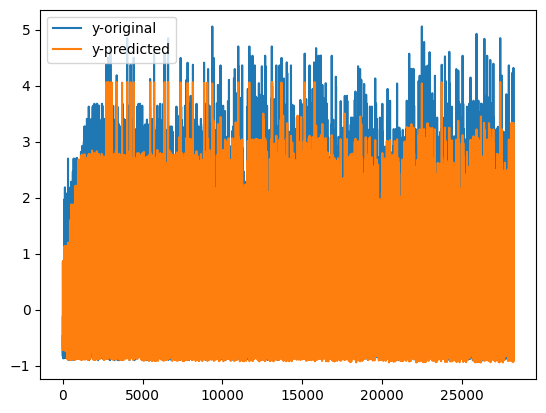

In [ ]:
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(features,target)

y_pred = regressor.predict(features)

#We'll check a mean squared error rate

mse_krr = mean_squared_error(target, y_pred)
print('mean_squared_error:',mse_krr)
r2=r2_score(target,y_pred)
print('R_Square:',r2)
mae= mean_absolute_error(target,y_pred)
print('mean_absolute_error:',mae)

RMSE=math.sqrt(mse_krr)
print('Root_mean_error:',RMSE)

#Finally, we'll plot the results.

plt.plot(target, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

Fitting with keras sequential model


883/883 [==============================] - 1s 1ms/step
mean_squared_error: 0.07911236814730385
R_Square: 0.9208876318526962
mean_absolute_error: 0.15049249880479365
Root_mean_error: 0.2812692093836505


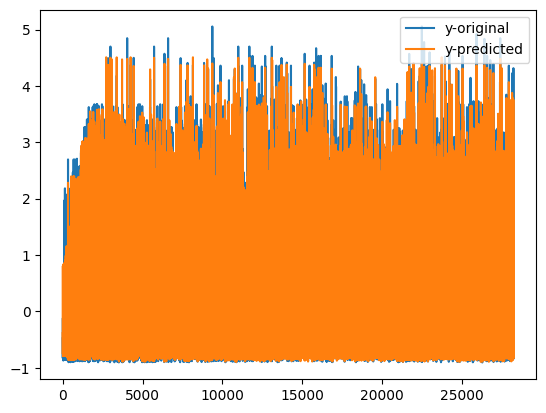

In [ ]:
model = BuildModel()
model.fit(features, target, epochs=100, verbose=False, shuffle=False)
y_krm = model.predict(features)

mse_krr = mean_squared_error(target, y_pred)
print('mean_squared_error:',mse_krr)
r2=r2_score(target,y_pred)
print('R_Square:',r2)
mae= mean_absolute_error(target,y_pred)
print('mean_absolute_error:',mae)

RMSE=math.sqrt(mse_krr)
print('Root_mean_error:',RMSE)

plt.plot(target, label="y-original")
plt.plot(y_krm, label="y-predicted")
plt.legend()
plt.show()

In [ ]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 'R Squared value:', 0.9096206893872285, 'Mean absolute error:', 0.1915611979696626, 'Mean squared error', 0.08918601289161011, 'Root mean squared error', 1.3352362310720987]
['RandomForestRegressor', 'R Squared value:', 0.6956632522380336, 'Mean absolute error:', 0.3697240068617295, 'Mean squared error', 0.3003185234016814, 'Root mean squared error', 1.285337552035706]
['SVR', 'R Squared value:', 0.9366511466144574, 'Mean absolute error:', 0.12611414270007185, 'Mean squared error', 0.06251244467794542, 'Root mean squared error', 1.3759479305133313]
['DecisionTreeRegressor', 'R Squared value:', 0.9823229775060417, 'Mean absolute error:', 0.027037277451089334, 'Mean squared error', 0.017443628916203126, 'Root mean squared error', 1.4019346457600208]


In [ ]:
if isinstance(features, np.ndarray):
    feature_names = [str(i) for i in range(features.shape[1])]
else:
    feature_names = [str(i) for i in features.columns]

new_data = pd.DataFrame({"Year":[1990],"Temperature": [30], "Avg. Rain fall": [1484], "Pesticides": [200]})
for feature_name in feature_names:
    if feature_name not in new_data.columns:
        new_data[feature_name] = 0

if isinstance(features, np.ndarray):
    new_data = new_data.iloc[:, list(map(int, feature_names))]
if not isinstance(features, np.ndarray):
    new_data = int(new_data[features.columns.astype(str)])

print("Shape of new_data: {}".format(new_data.shape))

prediction = model.predict(new_data)

print("Crop yield prediction: {:.2f} tons per hectare".format(prediction.item()))

Shape of new_data: (1, 113)
1/1 [==============================] - 0s 86ms/step


<ipython-input-62-51483bcbebd0>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[feature_name] = 0
<ipython-input-62-51483bcbebd0>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[feature_name] = 0
<ipython-input-62-51483bcbebd0>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_

Crop yield prediction: 259.46 tons per hectare
